In [14]:
# Load dataset ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/danial/Data Science/Fraud Detection/Data/featured/featured.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Hour,Day,Is_Weekend,Log_Amount,Amount_per_Hour,Day_Amount_Diff
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,149.62,0,0.0,0.0,False,5.014760,149.62,58.969206
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,2.69,0,0.0,0.0,False,1.305626,2.69,-87.960794
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,378.66,0,0.0,0.0,False,5.939276,378.66,288.009206
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,123.50,0,0.0,0.0,False,4.824306,123.50,32.849206
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,69.99,0,0.0,0.0,False,4.262539,69.99,-20.660794


In [10]:
#Check for missing values ---
df.isnull().sum()


Time               0
V1                 0
V2                 0
V3                 0
V4                 0
V5                 0
V6                 0
V7                 0
V8                 0
V9                 0
V10                0
V11                0
V12                0
V13                0
V14                0
V15                0
V16                0
V17                0
V18                0
V19                0
V20                0
V21                0
V22                0
V23                0
V24                0
V25                0
V26                0
V27                0
V28                0
Amount             0
Class              0
Hour               0
Day                0
Is_Weekend         0
Log_Amount         0
Amount_per_Hour    0
Day_Amount_Diff    0
dtype: int64

In [11]:
#Separate numerical features and target ---
num_features = ['V' + str(i) for i in range(1,29)] + ['Amount','Hour','Day','Log_Amount','Amount_per_Hour','Day_Amount_Diff']
bool_cols = ['Is_Weekend']
target = df['Class']


In [12]:
#Scale numerical features ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_features])

df_scaled_num = pd.DataFrame(scaled_data, columns=num_features)


In [13]:
#Combine scaled features with boolean and target ---
df_scaled = pd.concat([df_scaled_num, df[bool_cols], target], axis=1)


df_scaled['Class'].unique()


array([0, 1])

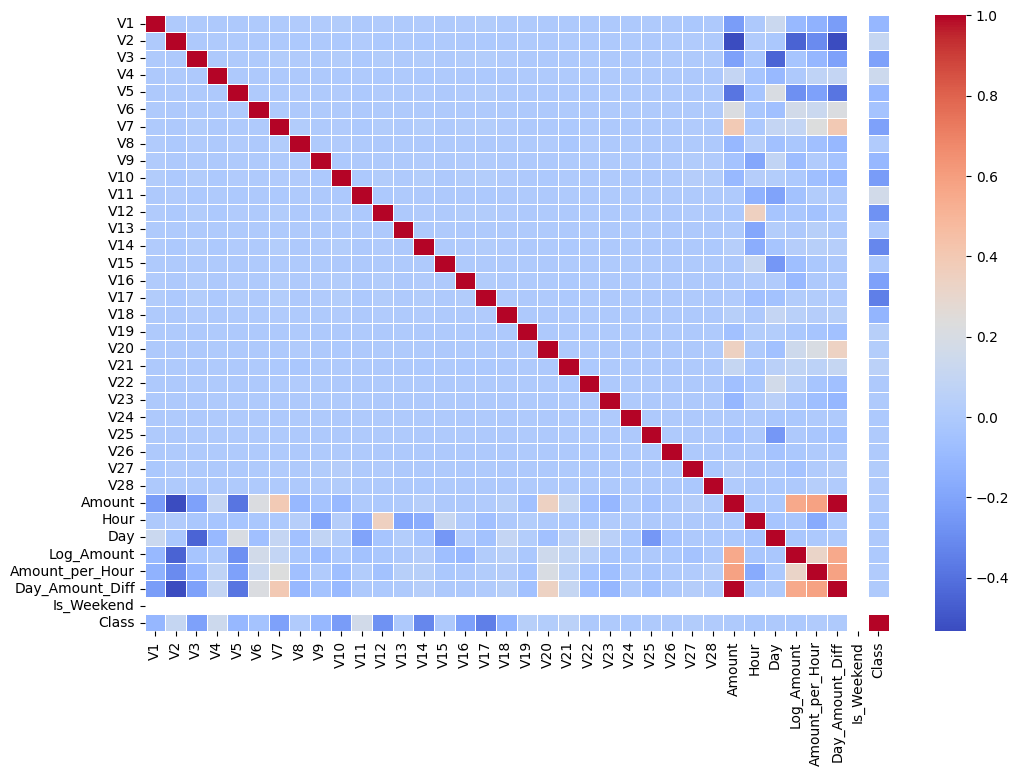

[('Day_Amount_Diff', 'Amount', np.float64(0.9999631877774537))]

In [15]:
# Correlation heatmap ---


corr_matrix = df_scaled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()


upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(col, row, upper[col][row]) for col in upper.columns for row in upper.index if not np.isnan(upper[col][row]) and upper[col][row] > 0.95]
high_corr_pairs


In [16]:
#Save preprocessed dataset ---
df_scaled.to_csv('/home/danial/Data Science/Fraud Detection/Data/processed/preprocessed.csv', index=False)
